# UDFs and Random Data

In [12]:
import numpy as np
import numba as nb
import math

%matplotlib inline
%load_ext memprofiler

The memprofiler extension is already loaded. To reload it, use:
  %reload_ext memprofiler


In [13]:
# Params for array construction
shape = (40_000, 40_000)
dtype = np.float32

In [14]:
%%mprof_run

rand_data = np.random.random_sample(shape).astype(dtype)

memprofiler: used 6102.74 MiB RAM (peak of 18302.23 MiB) in 16.3103 s, total RAM usage 6290.15 MiB


In [15]:
@nb.jit
def circle_filter(val: float, row: int, col: int, nrows: int, ncols: int) -> float:
    x = (2. * row / nrows) - 1.
    y = (2. * col / ncols) - 1.
    if ((x ** 2 + y ** 2) <= 1) and val >= 0.5:
        return 1.
    return math.nan

In [16]:
@nb.jit
def circle_fun(out, vals, nrows: int, ncols: int) -> int:
    n = out.shape[0]
    m = out.shape[1]
    for i in range(n):
        for j in range(m):
            out[i, j] = circle_filter(vals[i, j], i, j, nrows, ncols)
    return 0

In [17]:
%%mprof_run numba_circle

circle = np.empty(shape, dtype)
circle_fun(circle, rand_data, *shape)

0

memprofiler: used 6109.00 MiB RAM (peak of 6109.00 MiB) in 5.4407 s, total RAM usage 12399.48 MiB


In [18]:
%mprof_plot numba_circle

In [19]:
%%time
area_circle = np.nansum(circle)

CPU times: user 8.84 s, sys: 1.67 s, total: 10.5 s
Wall time: 10.5 s


In [20]:
%%time
area_square = np.nansum(rand_data)

CPU times: user 2.83 s, sys: 1.59 s, total: 4.42 s
Wall time: 4.42 s


In [21]:
print(f"PI value: {4 * area_circle / area_square}")

PI value: 3.141468139698623


mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
PI value: 3.1416853624453087


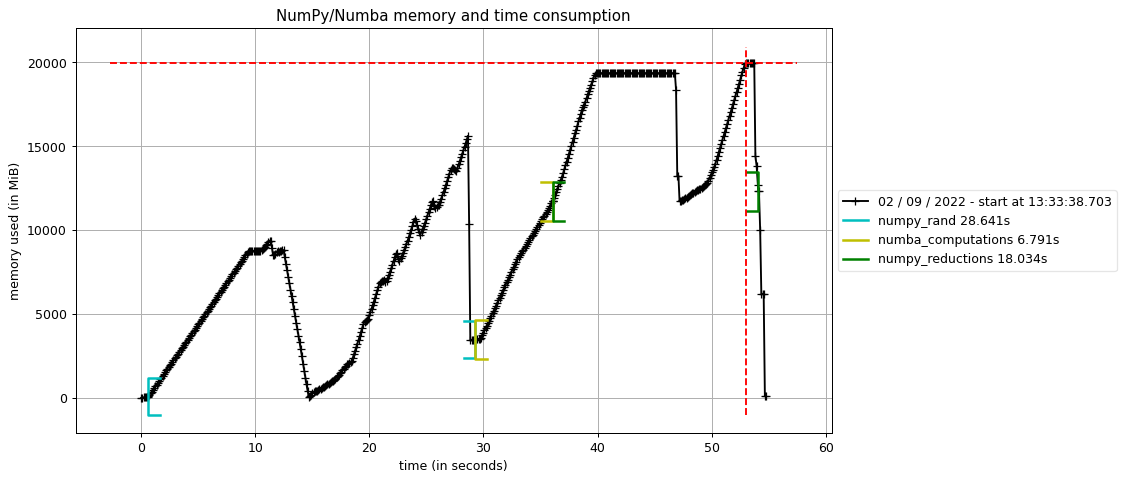

In [22]:
%rm UDFs-Random-Numba-NaN-2.dat
%run -m mprof run -o UDFs-Random-Numba-NaN-2.dat UDFs-Random-Numba-NaN-2.py
%run -m mprof plot UDFs-Random-Numba-NaN-2.dat -t "NumPy/Numba memory and time consumption"